In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from calendar import month_name

import warnings 

warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('../messages.csv')

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

df['From'] = df['From'].fillna(0).astype(int)

year = 2023

particular_year = df[df['Date'].dt.year == year]

particular_year['Month'] = particular_year['Date'].dt.month_name()

month_order = [month_name[i] for i in range(1, 13)]

particular_year['Month'] = pd.Categorical(particular_year['Month'], categories=month_order, ordered=True)

monthly_message_counts = particular_year.groupby('Month').size()

# Messages per month 

In [6]:
monthly_message_count = particular_year.groupby(['Month', 'From']).size().unstack(fill_value=0)

top_10_members = monthly_message_count.sum().nlargest(10).index

top_10_to_50_members = monthly_message_count.sum().nlargest(50).index.difference(top_10_members)

df_for_plot = pd.DataFrame({
    'Top 10 actives': monthly_message_count[top_10_members].sum(axis=1),
    'Top 10-50 actives': monthly_message_count[top_10_to_50_members].sum(axis=1),
    'Others': monthly_message_count.drop(columns=top_10_members.union(top_10_to_50_members)).sum(axis=1)
})

ax = df_for_plot.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))

for p, month in zip(ax.patches, monthly_message_counts.index):
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{monthly_message_counts[month]}', (x + width/2, monthly_message_counts[month] + 5), ha='center', va='bottom', fontsize=10)

plt.title(f'Message count per month with user category in {year}')
plt.xlabel('Month')
plt.ylabel('Number of Messages')
plt.legend(title='User Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')

plt.show()

# Messages per year

In [7]:
df['Year'] = df['Date'].dt.year
years = df.groupby('Year').size()

In [8]:
dict_years = years.to_dict()

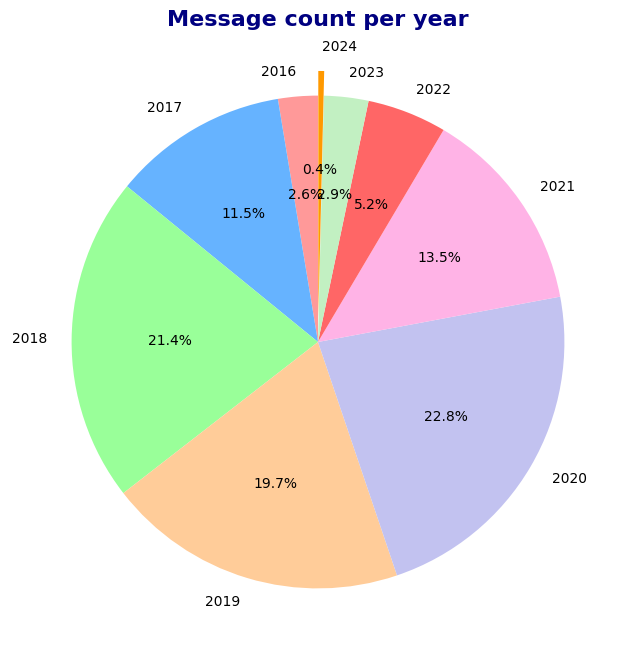

In [9]:
plt.figure(figsize=(8, 8))

# Explode the last slice (index 8 corresponds to '2024')
explode = [0] * (len(dict_years) - 1) + [0.1]  # Explode the last slice

colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#ff6666', '#c2f0c2', '#ff9900']

plt.pie(dict_years.values(), labels=dict_years.keys(), autopct='%1.1f%%', startangle=90, explode=explode, colors=colors)

plt.title('Message count per year', fontsize=16, fontweight='bold', color='navy')

plt.show()
